In [ ]:
import pandas as pd
import numpy as np


dates = pd.date_range(start="2021-01-01", periods=1000, freq='D')
np.random.seed(42)
sales = np.random.poisson(lam=200, size=len(dates)) + np.random.normal(0, 20, len(dates))
sales = np.clip(sales, 50, None).round()
sales_df = pd.DataFrame({"Date": dates, "Sales": sales})
sales_df.to_csv("sales_data.csv", index=False)

In [3]:
!pip install statsmodels


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB 262.6 kB/s eta 0:00:37
   ---------------------------------------- 0.0/9.6 MB 245.8 kB/s eta 0:00:40
    --------------------------------------- 0.2/9.6 MB 952.6 kB/s eta 0:00:10
   - -------------------------------------- 0.3/9.6 MB 1.5 MB/s eta 0:00:07
   -- ------------------------------------- 0.5/9.6 MB 2.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.6 MB 2.0 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.6 MB 2.1 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/9.6 MB 2.2 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/9.6 MB 2.4 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.6 MB 2.6 MB/s eta 0:00:04
   ----- ------------------


[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: C:\Users\amith\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder


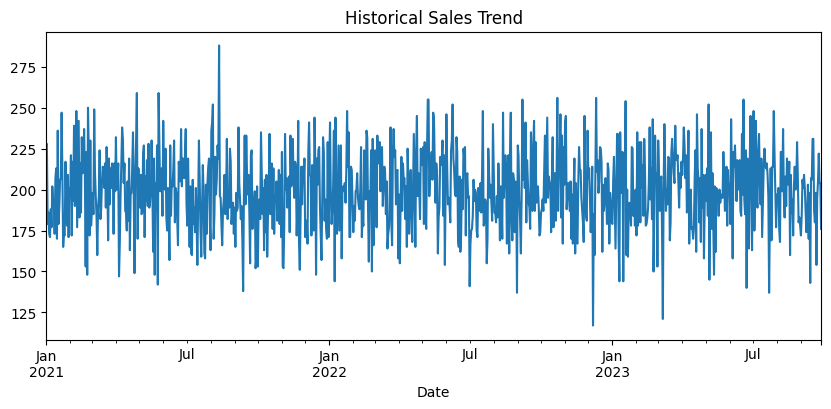

In [5]:
sales = pd.read_csv("sales_data.csv", parse_dates=["Date"])
sales.set_index("Date", inplace=True)
sales["Sales"].plot(title="Historical Sales Trend", figsize=(10,4))
plt.show()

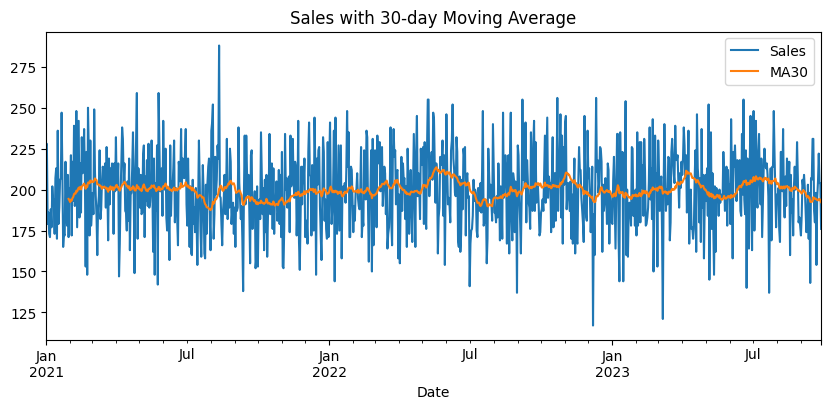

In [6]:
sales["MA30"] = sales["Sales"].rolling(window=30).mean()
sales[["Sales", "MA30"]].plot(title="Sales with 30‑day Moving Average", figsize=(10,4))
plt.show()


C:\Users\amith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\amith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\amith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\amith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCac

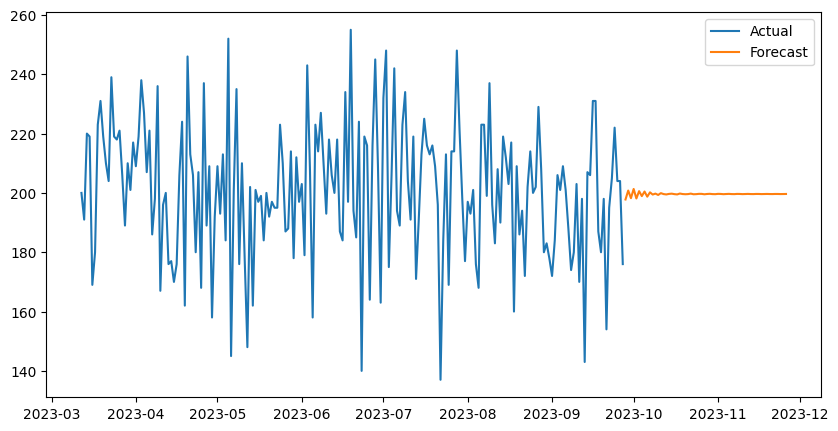

In [7]:
model = ARIMA(sales["Sales"], order=(5,1,5))
res = model.fit()
forecast = res.forecast(steps=60)
plt.figure(figsize=(10,5))
plt.plot(sales["Sales"][-200:], label="Actual")
plt.plot(forecast, label="Forecast")
plt.legend()
plt.show()

In [8]:
rmse = np.sqrt(mean_squared_error(sales["Sales"][-60:], forecast[:60]))
print("RMSE:", rmse)

RMSE: 19.645266636628467


Project 2

In [9]:
num = 1000
np.random.seed(42)
heart_df = pd.DataFrame({
    "Age": np.random.randint(30, 80, num),
    "Gender": np.random.choice(["Male", "Female"], num),
    "Cholesterol": np.random.randint(150, 300, num),
    "Blood_Pressure": np.random.randint(90, 180, num),
    "Heart_Disease": np.random.choice([0, 1], num, p=[0.6, 0.4])
})
heart_df.to_csv("heart_disease.csv", index=False)

In [10]:
heart = pd.read_csv("heart_disease.csv")
# Encoding
heart["Gender_enc"] = LabelEncoder().fit_transform(heart["Gender"])
X = heart[["Age","Gender_enc","Cholesterol","Blood_Pressure"]]
y = heart["Heart_Disease"]

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


Accuracy: 0.555
              precision    recall  f1-score   support

           0       0.58      0.87      0.70       118
           1       0.35      0.10      0.15        82

    accuracy                           0.56       200
   macro avg       0.46      0.49      0.43       200
weighted avg       0.49      0.56      0.47       200



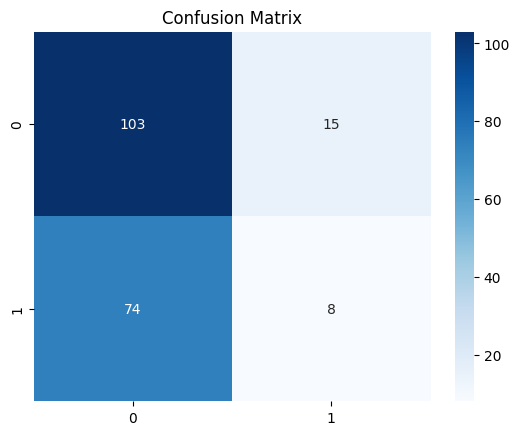

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.show()